# Convolutional Layer



In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "autoencoders"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

### plot grayscale and RGB

In [5]:
def plot_image(image):
    plt.imshow(image, cmap = "gray", interpolation = "nearest")
    plt.axis("off")
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation = "nearest")
    plt.axis("off")
    

In [7]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

# What's convolutional ?? ex. convolutional layer

In [8]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")

flower =load_sample_image("flower.jpg")

image = china[150:220, 130:250]

height, width, channels = image.shape

image_grayscale = image.mean(axis = 2).astype(np.float32)

images = image_grayscale.reshape(1, height, width, 1)

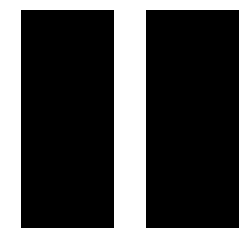

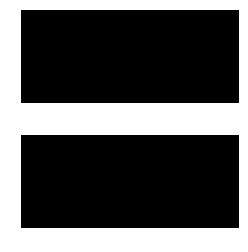

In [11]:
fmap = np.zeros(shape=(7,7,1,2), dtype = np.float32)
fmap[:,3,0,0]= 1
fmap[3,:,0,1] = 1
fmap[:,:,0,0]

plot_image(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1])

plt.show()


In [23]:
reset_graph()
X = tf.placeholder(tf.float32, shape = (None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides = [1,1,1,1], padding = "SAME", use_cudnn_on_gpu  = False)



In [24]:
with tf.Session() as sess:
    output = tf.nn.conv2d(X, feature_maps, strides = [1,1,1,1], padding = "SAME", use_cudnn_on_gpu = False)

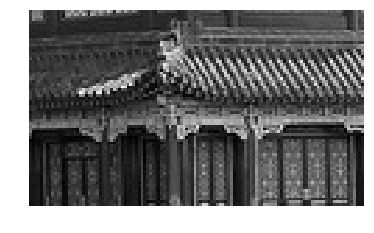

In [21]:
plot_image(images[0,:,:,0])

plt.show()

TypeError: Image data can not convert to float

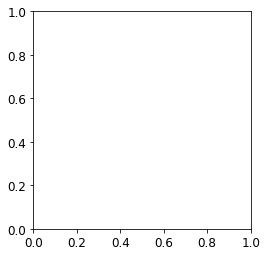

In [25]:
plot_image(output[0,:,:,1])

# Simple example


In [27]:
import numpy as np

from sklearn.datasets import load_sample_images

# Load sample images

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype = np.float32)

qcbatch_size, height, width, channel = dataset.shapefacefacfafacenaverfnan

array([[[[ 174.,  201.,  231.],
         [ 174.,  201.,  231.],
         [ 174.,  201.,  231.],
         ..., 
         [ 250.,  251.,  255.],
         [ 250.,  251.,  255.],
         [ 250.,  251.,  255.]],

        [[ 172.,  199.,  229.],
         [ 173.,  200.,  230.],
         [ 173.,  200.,  230.],
         ..., 
         [ 251.,  252.,  255.],
         [ 251.,  252.,  255.],
         [ 251.,  252.,  255.]],

        [[ 174.,  201.,  231.],
         [ 174.,  201.,  231.],
         [ 174.,  201.,  231.],
         ..., 
         [ 252.,  253.,  255.],
         [ 252.,  253.,  255.],
         [ 252.,  253.,  255.]],

        ..., 
        [[  88.,   80.,    7.],
         [ 147.,  138.,   69.],
         [ 122.,  116.,   38.],
         ..., 
         [  39.,   42.,   33.],
         [   8.,   14.,    2.],
         [   6.,   12.,    0.]],

        [[ 122.,  112.,   41.],
         [ 129.,  120.,   53.],
         [ 118.,  112.,   36.],
         ..., 
         [   9.,   12.,    3.],
       

# Valid and Same ????

# reset_graph()

filter_primes =  np.array([2.,3.,5.,7.,11.,13.], dtype = np.float32)

x = tf.constant(np.arange()),.

In [1]:
import tensorflow as tf

height = 28

width = 28

channels = 1

n_inputs = height * width

conv1_fmaps = 32

conv1_ksize = 3

conv1_stride = 1

conv1_pad = "SAME"

conv2_fmaps= 64
conv2_ksize = 3

conv2_stride = 1

conv2_pad = "SAME"

conv2_dropout_rate = 0.25


pool3_fmaps = conv2_fmaps 


n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10



with tf.name_scope("inputs"):
    X= tf.placeholder(tf.float32, shape =[None,n_inputs], name ="X")
    X_reshape = tf.reshape(X, shape = [-1, height,width, channels])
    y = tf.placeholder(tf.int32, shape = [None], name ="y")
    training = tf.placeholder_with_default(False, shape = [], name = "training")

    
    
conv1= tf.layers.conv2d(X_reshape, filters = conv1_fmaps, kernel_size = conv1_ksize, 
                        strides = conv1_stride, padding = conv1_pad, activation = tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters = conv2_fmaps, kernel_size = conv2_ksize, strides =conv2_stride, padding = conv2_pad, activation=tf.nn.relu, name = "conv2")


with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID")
    pool3_flat = tf.reshape(pool3, shape = [-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flata, conv2_dropout_rate, training=training)
    
    

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation = tf.nn.relu, name = "fc1")
    fc1_drop = tf.layers.dropout(fc1,fc1_dropout_rate, training = training)
    
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name = "output")
    Y_proba = tf.nn.softmax
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y , 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    


NameError: name 'pool3_flata' is not defined

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                 for gvar_name in gvar_names}
    init_values = {gvar_name : assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name] : model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict = feed_dict)
    
    

In [7]:
import numpy as np

In [16]:
n_epochs = 1000
batch_size = 50


best_loss_val = np.infty

check_interval = 500

checks_since_last_progress = 0

max_checks_without_progress = 20

best_model_params = None

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size ):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y:y_batch, training  :True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict = {X : mnist.validation.images, y :mnist.validation.labels})
                
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0 
                    best_model_params = get_model_params()
                    
                
                else: 
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y:y_batch})
        acc_val = accuracy.eval(feed_dict ={X: mnist.validation.images, 
                                          y: mnist.validation.labels})
        print("Epoch {}, train accuracy : {: .4f}%, valid.accuracy : {:.4f}%, valid. best loss:{:6f}".format(
                epoch,acc_train*100, acc_val * 100, best_loss_val)) 
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break
    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(ffed_dict = {X: mnist.test.images, 
                                         y: mnist.test.labels})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

Epoch 0, train accuracy :  100.0000%, valid.accuracy : 98.6800%, valid. best loss:0.053843
Epoch 1, train accuracy :  100.0000%, valid.accuracy : 98.8400%, valid. best loss:0.040230
Epoch 2, train accuracy :  100.0000%, valid.accuracy : 98.8800%, valid. best loss:0.040230
Epoch 3, train accuracy :  100.0000%, valid.accuracy : 98.9600%, valid. best loss:0.036717
Epoch 4, train accuracy :  100.0000%, valid.accuracy : 98.8600%, valid. best loss:0.036717
Epoch 5, train accuracy :  100.0000%, valid.accuracy : 98.9600%, valid. best loss:0.036717
Epoch 6, train accuracy :  100.0000%, valid.accuracy : 98.7200%, valid. best loss:0.036717
Epoch 7, train accuracy :  100.0000%, valid.accuracy : 98.9600%, valid. best loss:0.036717
Epoch 8, train accuracy :  100.0000%, valid.accuracy : 98.9400%, valid. best loss:0.036717
Epoch 9, train accuracy :  100.0000%, valid.accuracy : 98.9600%, valid. best loss:0.036717
Epoch 10, train accuracy :  100.0000%, valid.accuracy : 98.9600%, valid. best loss:0.03671

TypeError: eval() got an unexpected keyword argument 'ffed_dict'

In [2]:
reset_graph()



NameError: name 'reset_graph' is not defined

# Classifying large image!!

In [ ]:
width = 299
height = 299

channels = 3



In [ ]:
import matplotlib.image as mpimg

test_image = mpimg.imread(os.path.join("images", "cnn","test_image.png"))[:, :, :channels]

plt.imshow(test_image)
plt.axis("off")
plt.show()